## Probability Mass Function

In [1]:
import numpy as np
import pandas as pd

In [2]:
import random

L = []

for i in range(10000):
    L.append(random.randint(1, 6))

len(L)

10000

In [3]:
L[:5]

[1, 1, 4, 2, 3]

In [4]:
pd.Series(L).value_counts()

1    1710
2    1707
5    1692
6    1652
4    1635
3    1604
Name: count, dtype: int64

In [5]:
pd.Series(L).value_counts().sum()

10000

In [6]:
s = ((pd.Series(L).value_counts()) / pd.Series(L).value_counts().sum()).sort_index()
s

1    0.1710
2    0.1707
3    0.1604
4    0.1635
5    0.1692
6    0.1652
Name: count, dtype: float64

<Axes: >

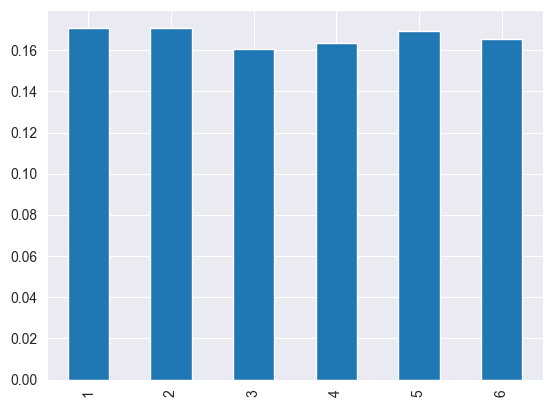

In [7]:
s.plot(kind='bar')

In [8]:
L = []

for i in range(10000):
    a = random.randint(1, 6)
    b = random.randint(1, 6)

    L.append(a + b)

len(L)

10000

In [9]:
L[:12]

[10, 4, 7, 7, 8, 10, 6, 7, 8, 7, 10, 10]

In [10]:
s = (pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index()
s

2     0.0280
3     0.0558
4     0.0870
5     0.1047
6     0.1373
7     0.1685
8     0.1396
9     0.1068
10    0.0845
11    0.0569
12    0.0309
Name: count, dtype: float64

<Axes: >

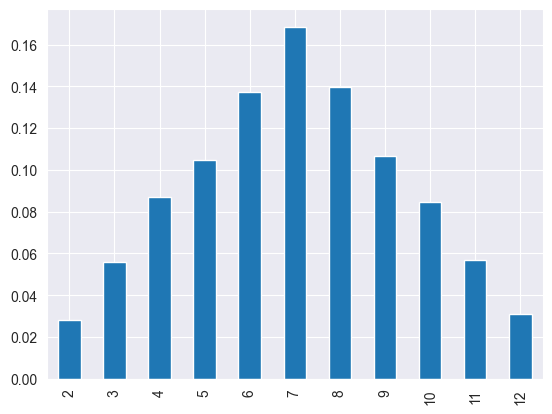

In [11]:
s.plot(kind='bar')

## Cumulative Distribution Function (CDF) of the PMF

In [12]:
s

2     0.0280
3     0.0558
4     0.0870
5     0.1047
6     0.1373
7     0.1685
8     0.1396
9     0.1068
10    0.0845
11    0.0569
12    0.0309
Name: count, dtype: float64

In [13]:
np.cumsum(s)

2     0.0280
3     0.0838
4     0.1708
5     0.2755
6     0.4128
7     0.5813
8     0.7209
9     0.8277
10    0.9122
11    0.9691
12    1.0000
Name: count, dtype: float64

<Axes: >

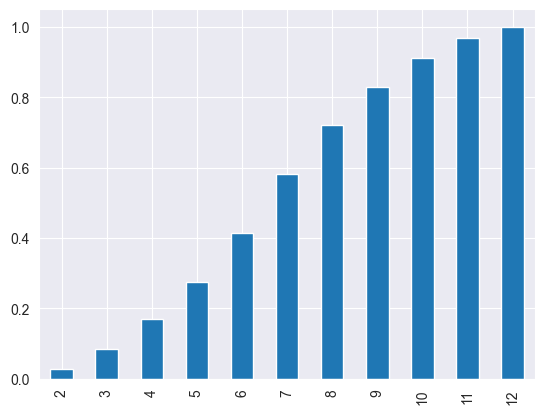

In [14]:
np.cumsum(s).plot(kind='bar')

## Probability Density Function

- ## Parametric Density Estimation

In [15]:
import matplotlib.pyplot as plt
from numpy.random import normal

# 1000 datapoints
# loc = mean = 50 
# std dev = 5

sample = normal(loc=50, scale=5, size=1000)

In [16]:
sample[:10]

array([42.22212752, 53.33113955, 42.47888737, 57.32935943, 48.92680082,
       53.14788615, 48.7114984 , 55.14332   , 43.26767056, 45.5115531 ])

In [17]:
sample.mean()

49.86427622440347

In [18]:
sample.std()

4.867152188895222

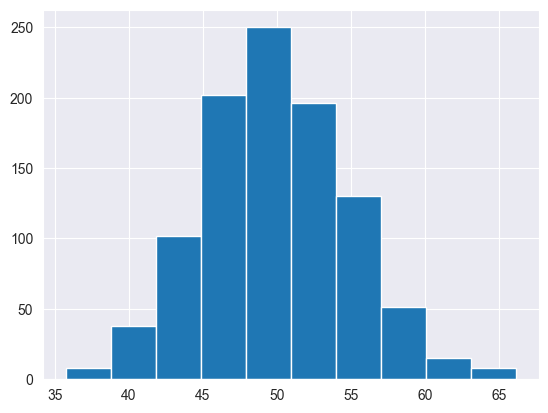

In [19]:
# plot histogram to understand the distribution of data

plt.hist(sample, bins=10)
plt.show()

By looking at the above graph we can conclude that it could be a normal distribution

In [20]:
# Calculate sample mean and sample std dev

sample_mean = sample.mean()
sample_std = sample.std()

print(sample_mean)
print(sample_std)

49.86427622440347
4.867152188895222


In [21]:
# Fir the distribution with the above parameters

from scipy.stats import norm

dist = norm(sample_mean, sample_std)
dist

In [22]:
print(sample.min())
print(sample.max())

35.73335335199168
66.16215531647256


In [23]:
values = np.linspace(sample.min(), sample.max(), 100)
print(values.shape)
values[:5]

(100,)


array([35.73335335, 36.04071499, 36.34807662, 36.65543826, 36.9627999 ])

In [24]:
probabilities_density = [dist.pdf(value) for value in values]
len(probabilities_density)

100

In [25]:
probabilities_density[:5]

[0.0012112595465715889,
 0.001452102236303435,
 0.0017339047319022921,
 0.0020621550955097685,
 0.002442786300463285]

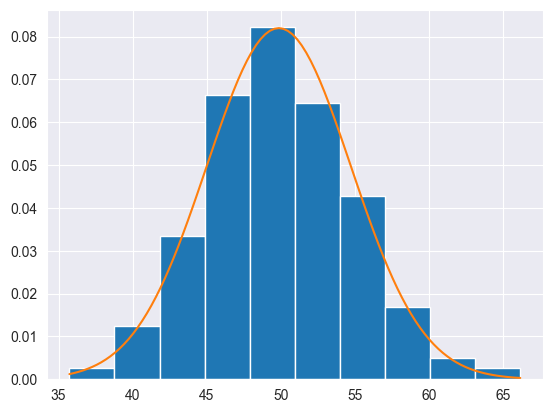

In [26]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities_density)

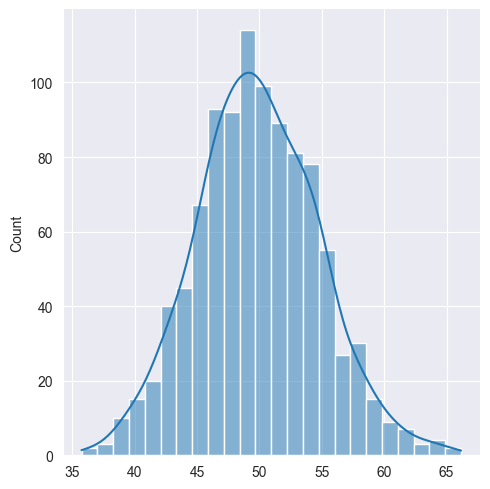

In [27]:
import seaborn as sns

sns.displot(sample, kde=True)

## Kernel Density Estimate (KDE)
- computationally expensive

In [28]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [29]:
sample.shape

(1000,)

In [30]:
sample[:10]

array([17.68207027, 31.39689709, 18.23633238, 22.84973002, 20.08491354,
       19.09749359, 20.67947426, 15.56750771, 23.36833091, 23.42761277])

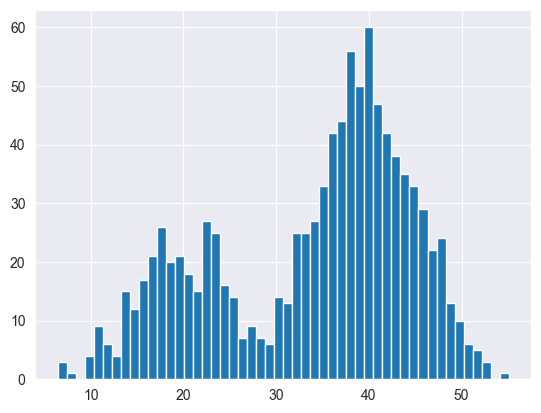

In [31]:
# plot histogram bins=50

plt.hist(sample, bins=50)
plt.show()

In [32]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

# convert data to a 2D array
print(len(sample), 1)
sample = sample.reshape((len(sample), 1))

model.fit(sample)

1000 1


KernelDensity(bandwidth=3)

In [33]:
print(sample.min(), sample.max())

6.443039492011643 55.080035367784745


In [34]:
values = np.linspace(sample.min(), sample.max(), 100)
print((len(values), 1))
values = values.reshape((len(values), 1))

(100, 1)


In [35]:
probabilities_density = model.score_samples(values)
probabilities_density = np.exp(probabilities_density)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

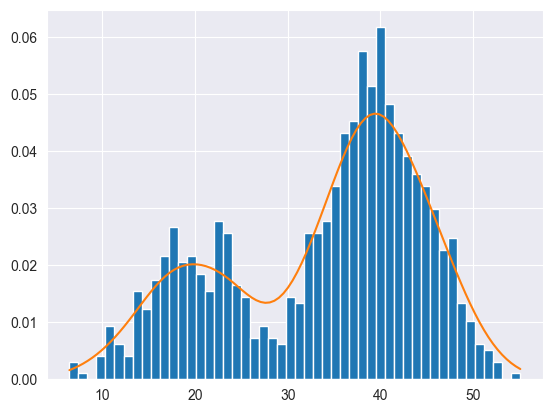

In [36]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities_density)
plt.show()

#### Seaborn KDE

<Axes: ylabel='Density'>

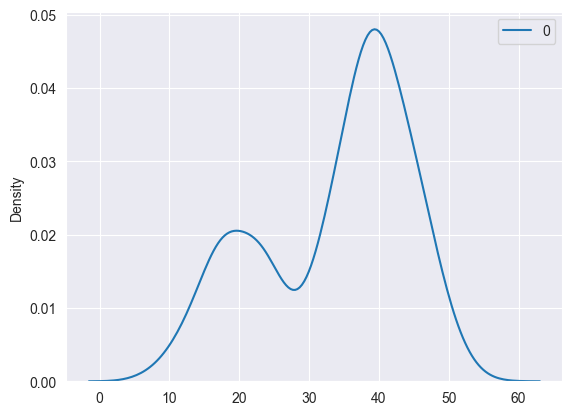

In [37]:
sns.kdeplot(sample, bw_adjust=1)

## Cumulative Distribution Function (CDF) for PDF
- This will show the probability on the y-axis
- When we apply integration on PDF, then we get the Cumulative Probability (CDF)
- When we apply differentiation on CDF, we get the PDF

In [38]:
import seaborn as sns

In [39]:
df = sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal_length', ylabel='Density'>

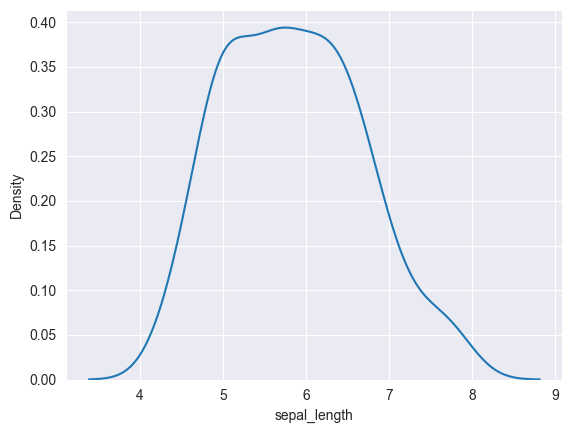

In [41]:
# PDF of sepal length
sns.kdeplot(df['sepal_length'])

<Axes: xlabel='sepal_length', ylabel='Density'>

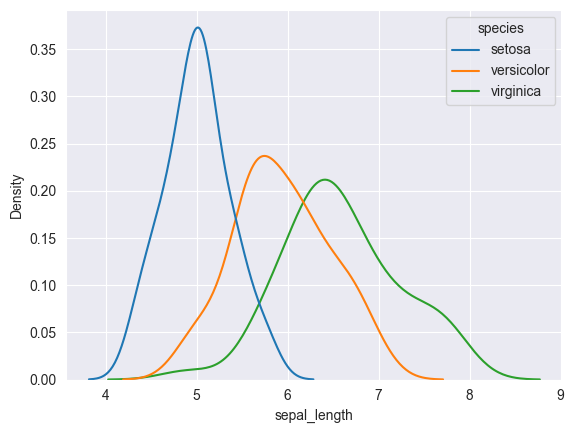

In [42]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

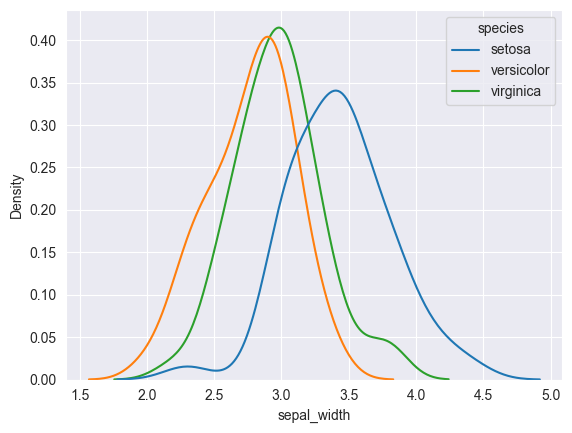

In [43]:
sns.kdeplot(df, x='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

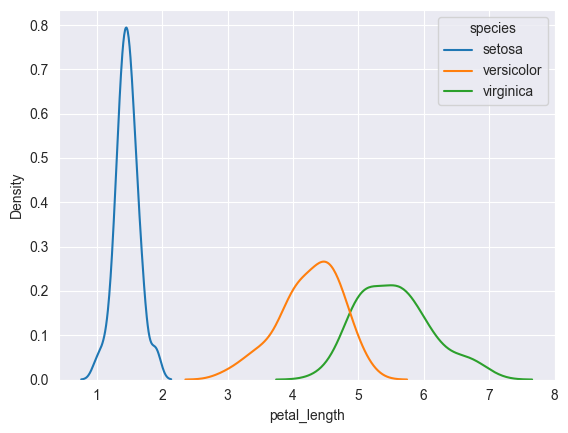

In [44]:
sns.kdeplot(df, x='petal_length', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

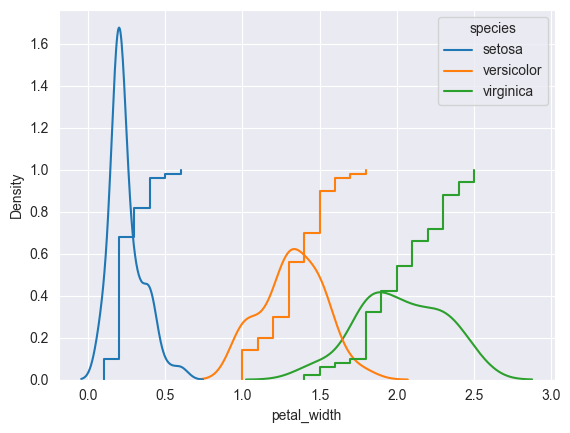

In [48]:
sns.kdeplot(df, x='petal_width', hue='species')
sns.ecdfplot(df, x='petal_width', hue='species')

In [46]:
titanic = pd.read_csv(
    'C://Sajjad//Learnings//Data Science Mentorship Program 2.0//Week 12 - Data Analysis Continued//session_29//train.csv')
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

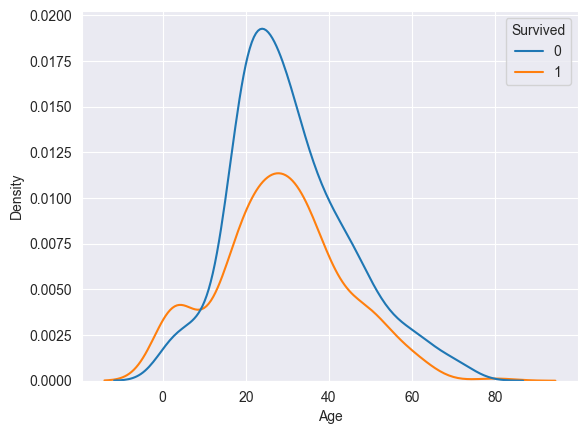

In [47]:
sns.kdeplot(titanic, x='Age', hue='Survived')

## 2D Plots

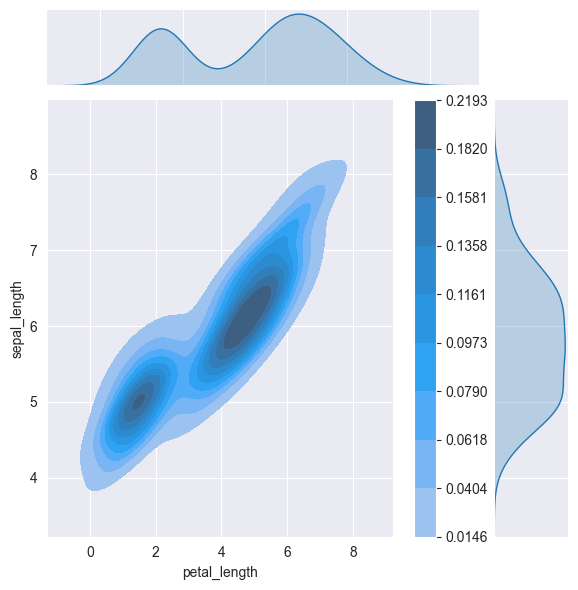

In [49]:
# contour Plot
sns.jointplot(df, x='petal_length', y='sepal_length', kind='kde', fill=True, cbar=True)

## Normal Distribution

<Axes: xlabel='Age', ylabel='Density'>

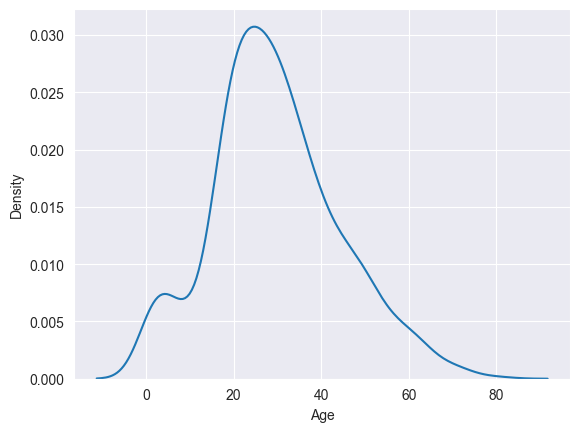

In [51]:
sns.kdeplot(titanic['Age'])

In [52]:
titanic['Age'].mean()

29.69911764705882

In [53]:
titanic['Age'].std()

14.526497332334042

<Axes: xlabel='Age', ylabel='Density'>

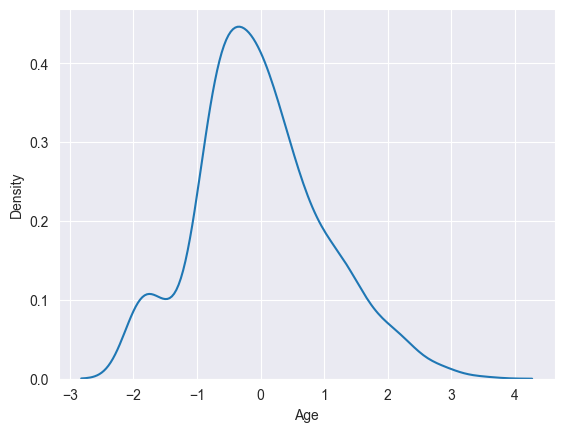

In [54]:
x = (titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std()
sns.kdeplot(x)

In [55]:
# it became close to zero
x.mean()

2.338621049070358e-16

In [56]:
# it became 1
x.std()

1.0

In [57]:
# Very close to zero
titanic['Age'].skew()

0.38910778230082704

### Outlier detection using Empirical rule

In [59]:
titanic['Age'].mean() + 3 * titanic['Age'].std()

73.27860964406094

In [60]:
titanic['Age'].mean() - 3 - titanic['Age'].std()

12.172620314724778

In [62]:
titanic[(titanic['Age'] > 73)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
